# Chapter 06 - Classification Example

Shows how to use Azure Machine Learning AutoML for classification

## Installation of relevant packages

In [1]:
# skip this step if you already have seaborn installed.
!pip install seaborn

## Getting Ready

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import logging

In [3]:
# import AzureML SDK
import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig

## Preparing the Azure Machine Learning Workspace

Ignore this section if the workspace has already been created in the Azure portal

In [50]:
ws = Workspace.from_config()

workspace_info = {}
workspace_info['SDK version'] = azureml.core.VERSION
workspace_info['Subscription ID'] = ws.subscription_id
workspace_info['Workspace Name'] = ws.name
workspace_info['Resource Group'] = ws.resource_group
workspace_info['Location'] = ws.location
pd.set_option('display.max_colwidth', -1)
workspace_info = pd.DataFrame(data = workspace_info, index = [''])
workspace_info.T

Found the config file in: /home/nbuser/library/config.json


,
Location,westus2
Resource Group,oreillybook
SDK version,1.0.17
Subscription ID,<Replace with actual subscription ID>
Workspace Name,automl-tutorials


In [17]:
# Choose a name for the experiment and specify the project folder.
experiment_name = 'automl-classification'
project_folder = './book/automl-classification'

experiment = Experiment(ws, experiment_name)


## Data Preparation

In [18]:
#define the column
columns = ['status_checking_acc', 'duration_months', 'credit_history', 'purpose', 'credit_amount',
           'saving_acc_bonds', 'present_emp_since','installment_rate', 'personal_status','other_debtors', 
           'residing_since', 'property', 'age_years','inst_plans', 'housing', 'num_existing_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [19]:
creditg_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', delim_whitespace = True, header = None )
creditg_df.columns = columns
creditg_df.head()

,status_checking_acc,duration_months,credit_history,purpose,credit_amount,saving_acc_bonds,present_emp_since,installment_rate,personal_status,other_debtors,...,property,age_years,inst_plans,housing,num_existing_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [20]:
# Get the unique values in the Status Column
creditg_df.status = creditg_df.status - 1

creditg_df['status'].unique()

array([0, 1])

In [21]:
#creditg_df['status'] =  creditg_df.status.astype(bool)
creditg_df.head()

,status_checking_acc,duration_months,credit_history,purpose,credit_amount,saving_acc_bonds,present_emp_since,installment_rate,personal_status,other_debtors,...,property,age_years,inst_plans,housing,num_existing_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [22]:
# Get the label column, and remove the label column from the dataframe
target = creditg_df["status"]

# when axis is 1, columns specified are dropped
creditg_df =  creditg_df.drop(labels='status',axis=1) 

In [23]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(creditg_df, target, test_size=0.3)

# convert y_train to a numpy array
 
y_train = y_train.values
y_test = y_test.values

In [24]:
# Understand the variables
creditg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
status_checking_acc     1000 non-null object
duration_months         1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
credit_amount           1000 non-null int64
saving_acc_bonds        1000 non-null object
present_emp_since       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residing_since          1000 non-null int64
property                1000 non-null object
age_years               1000 non-null int64
inst_plans              1000 non-null object
housing                 1000 non-null object
num_existing_credits    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
d

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn


Text(0, 0.5, 'Frequency')

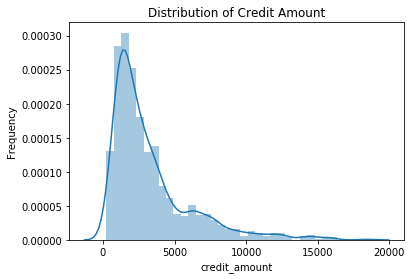

In [26]:
sn.distplot(creditg_df.credit_amount)
plt.title("Distribution of Credit Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

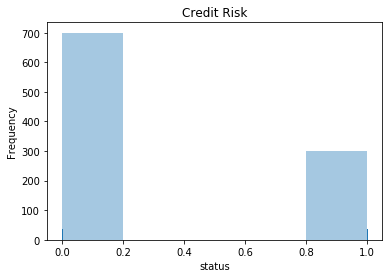

In [27]:
sn.distplot(target, kde=False, rug=True )
plt.title("Credit Risk")
plt.ylabel("Frequency")

## Using AutoML to train the model

In [28]:
X_train.head()

,status_checking_acc,duration_months,credit_history,purpose,credit_amount,saving_acc_bonds,present_emp_since,installment_rate,personal_status,other_debtors,residing_since,property,age_years,inst_plans,housing,num_existing_credits,job,dependents,telephone,foreign_worker
395,A12,39,A33,A46,11760,A62,A74,2,A93,A101,3,A124,32,A143,A151,1,A173,1,A192,A201
894,A14,18,A34,A43,1169,A65,A73,4,A93,A101,3,A122,29,A143,A152,2,A173,1,A192,A201
750,A11,6,A32,A42,428,A61,A75,2,A92,A101,1,A122,49,A141,A152,1,A173,1,A192,A201
757,A13,15,A34,A43,1271,A65,A73,3,A93,A101,4,A124,39,A143,A153,2,A173,1,A192,A201
515,A11,6,A34,A40,609,A61,A74,4,A92,A101,3,A122,37,A143,A152,2,A173,1,A191,A202


In [29]:
len(y_train)

700

In [30]:
# Explore the metrics that are available for classification
azureml.train.automl.utilities.get_primary_metrics('classification')

['precision_score_weighted',
 'accuracy',
 'AUC_weighted',
 'average_precision_score_weighted',
 'norm_macro_recall']

In [31]:
import time

automl_settings = {
    "name": "AutoML_Book_CH08_Classification_{0}".format(time.time()),
    "iteration_timeout_minutes": 10,
    "iterations": 10,
    "primary_metric": 'AUC_weighted',
    "preprocess": True,
    "max_concurrent_iterations": 10,
    "verbosity": logging.INFO
}


In [32]:
# ValueError: The training data contains datetime, categorical or text data. Please set preprocess flag as True
# Set Preprocess= True
automl_config = AutoMLConfig(task = 'classification',
                             debug_log = 'automl_errors.log',                             
                             X = X_train, 
                             y = y_train,
                             **automl_settings,
                            n_cross_validations = 5,
                             path = project_folder
                            )

In [33]:
local_run = experiment.submit(automl_config, show_output = True)

Running on local machine
Parent Run ID: AutoML_2d9e9ce1-40a5-4c83-bf03-99cd85947451
********************************************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
SAMPLING %: Percent of the training data to sample.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
********************************************************************************************************************

 ITERATION   PIPELINE                                       SAMPLING %  DURATION      METRIC      BEST
         0   MaxAbsScaler LightGBM                          100.0000    0:00:28       0.7625    0.7625
         1   MaxAbsScaler LightGBM                          100.0000    0:00:20       0.7604    0.7625
         2   MaxAbsScaler LightGBM                          100

In [34]:
#  ValueError: Invalid primary metric specified for classificatio
# lease use on of: ['norm_macro_recall', 'precision_score_weighted', 'average_precision_score_weighted', 'accuracy', 'AUC_weighted']


In [35]:
local_run

Experiment,Id,Type,Status,Details Page,Docs Page
automl-classification,AutoML_2d9e9ce1-40a5-4c83-bf03-99cd85947451,automl,Completed,Link to Azure Portal,Link to Documentation


## Understanding the results of the AutoML Run

In [ ]:
!pip install azureml-widgets

In [37]:
import azureml.widgets

In [38]:
from azureml.widgets import RunDetails
RunDetails(local_run).show() 

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

In [39]:
# Get all child runs
children = list(local_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}
    metricslist[int(properties['iteration'])] = metrics

rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9
AUC_macro,0.76,0.76,0.77,0.76,0.75,0.75,0.76,0.77,0.75,0.78
AUC_micro,0.76,0.76,0.77,0.76,0.75,0.75,0.76,0.77,0.75,0.78
AUC_weighted,0.76,0.76,0.77,0.76,0.75,0.75,0.76,0.77,0.75,0.78
accuracy,0.74,0.73,0.74,0.74,0.71,0.72,0.73,0.76,0.73,0.74
average_precision_score_macro,0.59,0.59,0.60,0.60,0.60,0.56,0.60,0.61,0.58,0.63
average_precision_score_micro,0.59,0.59,0.60,0.60,0.60,0.56,0.60,0.61,0.58,0.63
average_precision_score_weighted,0.59,0.59,0.60,0.60,0.60,0.56,0.60,0.61,0.58,0.63
balanced_accuracy,0.63,0.59,0.65,0.64,0.70,0.60,0.63,0.67,0.59,0.63
f1_score_macro,0.63,0.58,0.66,0.65,0.68,0.60,0.63,0.68,0.59,0.63
f1_score_micro,0.74,0.73,0.74,0.74,0.71,0.72,0.73,0.76,0.73,0.74


## Let's get the best model sofar


In [40]:
local_run

Experiment,Id,Type,Status,Details Page,Docs Page
automl-classification,AutoML_2d9e9ce1-40a5-4c83-bf03-99cd85947451,automl,Completed,Link to Azure Portal,Link to Documentation


In [41]:
best_run, fitted_model = local_run.get_output(metric = "AUC_weighted")
print(best_run)
print(fitted_model)

Run(Experiment: automl-classification,
Id: AutoML_2d9e9ce1-40a5-4c83-bf03-99cd85947451_9,
Type: None,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingclassifier', PreFittedSoftVotingClassifier(classification_labels=None,
               estimators=[('LightGBM', Pipeline(memory=None,
     steps=[('sparsenormalizer', <automl.client.core.common.model_wrappers.Sp...               flatten_transform=None,
               weights=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4]))])


## Testing the model

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [43]:
y_pred = fitted_model.predict(X_test)

In [44]:
len(y_pred)

300

In [45]:
len(y_test)

300

In [46]:
target_names = ['0','1']
print (classification_report(y_test,y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.77      0.91      0.84       214
          1       0.60      0.34      0.43        86

avg / total       0.73      0.75      0.72       300



In [47]:
print(roc_auc_score(y_test,y_pred))

0.6242121277983047


## Explainability of Models

In [19]:
project_folder = './book/automl-classification-explain'

In [20]:
automl_explain_config = AutoMLConfig(task = 'classification',
                            model_explainability=True,
                            debug_log = 'automl_errors.log',                             
                             X = X_train, 
                             y = y_train,
                             X_valid = X_test,
                             y_valid = y_test,
                             **automl_settings,
                             path = project_folder
                            )

In [24]:
from azureml.core.experiment import Experiment
experiment_e=Experiment(ws, 'automl_explain')

local_explain_run = experiment_e.submit(automl_explain_config, show_output = True)

Running on local machine
Parent Run ID: AutoML_edc85e4e-cc87-47eb-bfea-85397cd82e3d
*******************************************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
TRAINFRAC: Fraction of the training data to train on.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
*******************************************************************************************************************

 ITERATION   PIPELINE                                       TRAINFRAC  DURATION      METRIC      BEST
         0   SparseNormalizer LightGBM                      1.0000     0:05:07       0.7644    0.7644
         1   SparseNormalizer LightGBM                      1.0000     0:05:08       0.7885    0.7885
         2   StandardScalerWrapper LightGBM                 1.0000

In [25]:
best_run, fitted_model = local_explain_run.get_output()

In [ ]:
from azureml.widgets import RunDetails

RunDetails(local_explain_run).show()

In [28]:
from azureml.train.automl.automlexplainer import retrieve_model_explanation

shap_values, expected_values, overall_summary, overall_imp, per_class_summary, per_class_imp = \
    retrieve_model_explanation(best_run)

In [ ]:
print(overall_summary)
print(overall_imp)

